## Import Packages and set up plots etc

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import csv
import os
import scipy.stats as stats
import seaborn as sns
import math 
import matplotlib.animation as animation
import matplotlib.colors as mcol
import matplotlib.cm as cm
import time
import random
import statistics as stat
import collections
import copy 

import matplotlib.gridspec as gridspec


import PIL
from xml.dom import minidom
from shapely.geometry import Polygon, MultiPolygon
#from descartes import PolygonPatch
#from PIL import Image
from scipy.spatial import distance
from scipy import signal
from scipy import interpolate
from scipy.stats import variation
from mpl_toolkits.axes_grid1 import make_axes_locatable
from IPython.display import Image
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from celluloid import Camera
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

#plt.style.use('seaborn-white')

from matplotlib.collections import LineCollection, PatchCollection
from matplotlib.colors import ListedColormap, BoundaryNorm, LinearSegmentedColormap

%matplotlib inline
#%matplotlib qt
#%matplotlib notebook
#from google.colab import drive
#drive.mount("/content/gdrive")

In [2]:
font = {'family' : 'Helvetica',
        'weight' : 'normal',
        'size'   : 8}

mpl.rc('font', **font)
kwargs = dict(edgecolor = 'k', fc = 'xkcd:greyish', alpha=0.5, bins=20)

 ## source of this function: http://schubert.atmos.colostate.edu/~cslocum/custom_cmap.html#code
def make_cmap(colors, position=None, bit=False):

    if len(position) != len(colors):
        sys.exit('position length must be the same as colors')
    elif position[0] != 0 or position[-1] != 1:
        sys.exit('position must start with 0 and end with 1')
    
    cdict = {'red':[], 'green':[], 'blue':[]}
    for pos, color in zip(position, colors):

        cdict['red'].append((pos, color[0], color[0]))
        cdict['green'].append((pos, color[1], color[1]))
        cdict['blue'].append((pos, color[2], color[2]))

        cmap = mpl.colors.LinearSegmentedColormap('my_colormap',cdict,256)

    return cmap

## load source xml file
xmldoc = minidom.parse('/Volumes/SAF_Data/Python/colourmaps/mellow-rainbow.xml')
itemlist = xmldoc.getElementsByTagName('Point')
data_vals=[]
color_vals=[]

for s in itemlist:
    
    data_vals.append(float(s.attributes['x'].value))
    color_vals.append((float(s.attributes['r'].value),
    float(s.attributes['g'].value),
    float(s.attributes['b'].value)))

## construct the colormap

mycmap = make_cmap(color_vals,data_vals) ##this is the main rainbow colourmap to be used in the code
#print('converted successfully!')

#mycmap_r = ListedColormap(mycmap.colors[::-1])

# mycmap is matplotlib compatible object. to query color value out of it:

#print('example rgba value for data value 0 is: ' + str(mycmap(0.0)))

## load source xml file
xmldoc = minidom.parse('/Volumes/SAF_Data/Python/colourmaps/brown-2.xml')
itemlist = xmldoc.getElementsByTagName('Point')
data_vals=[]
color_vals=[]

for s in itemlist:
    
    data_vals.append(float(s.attributes['x'].value))
    color_vals.append((float(s.attributes['r'].value),
    float(s.attributes['g'].value),
    float(s.attributes['b'].value)))

## construct the colormap

ss_facies = make_cmap(color_vals,data_vals) ##this is the main rainbow colourmap to be used in the code
#print('converted successfully!')

## load source xml file
xmldoc = minidom.parse('/Volumes/SAF_Data/Python/colourmaps//green-brown-div.xml')
itemlist = xmldoc.getElementsByTagName('Point')
data_vals=[]
color_vals=[]

for s in itemlist:
    
    data_vals.append(float(s.attributes['x'].value))
    color_vals.append((float(s.attributes['r'].value),
    float(s.attributes['g'].value),
    float(s.attributes['b'].value)))

## construct the colormap

grads = make_cmap(color_vals,data_vals) ##this is the main rainbow colourmap to be used in the code
#print('converted successfully!')

xmldoc = minidom.parse('/Volumes/SAF_Data/Python/colourmaps/blue-3.xml')
itemlist = xmldoc.getElementsByTagName('Point')
data_vals=[]
color_vals=[]

for s in itemlist:
    
    data_vals.append(float(s.attributes['x'].value))
    color_vals.append((float(s.attributes['r'].value),
    float(s.attributes['g'].value),
    float(s.attributes['b'].value)))

## construct the colormap

depths = make_cmap(color_vals,data_vals) ##this is the main rainbow colourmap to be used in the code
#print('converted successfully!')

##for velocities

xmldoc = minidom.parse('/Volumes/SAF_Data/Python/colourmaps/orange-6.xml')
itemlist = xmldoc.getElementsByTagName('Point')
data_vals=[]
color_vals=[]

for s in itemlist:
    
    data_vals.append(float(s.attributes['x'].value))
    color_vals.append((float(s.attributes['r'].value),
    float(s.attributes['g'].value),
    float(s.attributes['b'].value)))

## construct the colormap

vels = make_cmap(color_vals,data_vals) ##this is the main rainbow colourmap to be used in the code
#print('converted successfully!')


# xmldoc = minidom.parse('/Volumes/SAF_Data/Python/colourmaps/1-3wbgy.xml')
# itemlist = xmldoc.getElementsByTagName('Point')
# data_vals=[]
# color_vals=[]

# for s in itemlist:
    
#     data_vals.append(float(s.attributes['x'].value))
#     color_vals.append((float(s.attributes['r'].value),
#     float(s.attributes['g'].value),
#     float(s.attributes['b'].value)))

# ## construct the colormap

# planformcmap = make_cmap(color_vals,data_vals) ##this is the main rainbow colourmap to be used in the code
# print('converted successfully!')



def reverse_colourmap(cmap, name = 'my_cmap_r'):
    reverse = []
    k = []   

    for key in cmap._segmentdata:    
        k.append(key)
        channel = cmap._segmentdata[key]
        data = []

        for t in channel:                    
            data.append((1-t[0],t[2],t[1]))            
        reverse.append(sorted(data))    

    LinearL = dict(zip(k,reverse))
    my_cmap_r = mpl.colors.LinearSegmentedColormap(name, LinearL) 
    return my_cmap_r

def hex_to_rgb(value):
    '''
    Converts hex to rgb colours
    value: string of 6 characters representing a hex colour.
    Returns: list length 3 of RGB values'''
    value = value.strip("#") # removes hash symbol if present
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))


def rgb_to_dec(value):
    '''
    Converts rgb to decimal colours (i.e. divides each value by 256)
    value: list (length 3) of RGB values
    Returns: list (length 3) of decimal values'''
    return [v/256 for v in value]

def get_continuous_cmap(hex_list, float_list=None):
    ''' creates and returns a color map that can be used in heat map figures.
        If float_list is not provided, colour map graduates linearly between each color in hex_list.
        If float_list is provided, each color in hex_list is mapped to the respective location in float_list. 
        
        Parameters
        ----------
        hex_list: list of hex code strings
        float_list: list of floats between 0 and 1, same length as hex_list. Must start with 0 and end with 1.
        
        Returns
        ----------
        colour map'''
    rgb_list = [rgb_to_dec(hex_to_rgb(i)) for i in hex_list]
    if float_list:
        pass
    else:
        float_list = list(np.linspace(0,1,len(rgb_list)))
        
    cdict = dict()
    for num, col in enumerate(['red', 'green', 'blue']):
        col_list = [[float_list[i], rgb_list[i][num], rgb_list[i][num]] for i in range(len(float_list))]
        cdict[col] = col_list
    cmp = mcol.LinearSegmentedColormap('my_cmp', segmentdata=cdict, N=256)
    return cmp

In [3]:
#planformcmap = reverse_colourmap(planformcmap)

ss_facies_r = reverse_colourmap(ss_facies)
timesteps_r = reverse_colourmap(mycmap)

In [4]:
Q = str(100)# discharge in m3/s
slope = 0.00137#gradient
d50 = 0.31e-3 #d50 grain size in m

thot_SS = 802800 #
#time from which we restarted the runs to add a flood
fldstart_s = 0 ##start time of flood in seconds
variabd = int(input('Enter DV flag: ')) #flag for if in variable discharge regime
adjustment_time = int(input('Enter bed adjustment time here, be wary of timestep conversion: ')) #number of timesteps, in hours taken for bed to equilibrate
iloc = int(input('Enter iloc: '))
fldlength = 0
idf = '0hfld' #identifier/classifier about the flood setting
intstring = '2hour' #time interval of output
nickname = 'agubh2-10km' #model nickname, agubh2, gentle_wide etc
floodname ='_0hrflood'

datnam = f'{idf}-datamaster-{intstring}.npy' #name of the data file to upload
dataloc = f'data-{nickname}{floodname}' #where csv files are
arrayfolder = f'c-{idf}-{nickname}' #where raw centroid data array stored
mainsurfto = f'ms-{idf}-{nickname}' #where bounding surfaces array will go
iricoutputt =600 #output time from the model, s

print(f'/Volumes/SAF_Data/Data/ConvertedArrays/{dataloc}/{datnam}')
datamaster = np.load(f'/Volumes/SAF_Data/NAYS2DH_files/Data/ConvertedArrays/{dataloc}/{datnam}', allow_pickle = True)



Enter DV flag:  0
Enter bed adjustment time here, be wary of timestep conversion:  65
Enter iloc:  340


/Volumes/SAF_Data/Data/ConvertedArrays/data-agubh2-10km_0hrflood/0hfld-datamaster-2hour.npy


More model set up

In [5]:
jloc = 14#location of the secion along j axis


cellW = 4
cellL = 10
xloc = iloc*cellL
xsloc = iloc*cellL
#print(xsloc)
spacing = 1 #spacing of cross stream x locations, m

ps = 2650 # bulk density of quartz kg/m3
p = 1000 # density of water in kg/m3
nu = 1.787*10e-6 #kinematic viscosity of water in m2/s
nu=1.0533e-6
g = 9.81 # acceleration due to gravity, m/s2

savefilesto = '/Volumes/SAF_Data/NAYS2DH_files/Plots/'
modelrun = f'{nickname}-{idf}-{iloc}'

## Import data

In [6]:
##define grid dimensions
gridx = 1001
gridy = 26

datacond = 1
if datacond == 1:
    cells = gridy
else:
    cells = gridx
length = 1001 #length of the domain in the x direction
erostart = 5
erostop = 5

print('Shape of the datamaster dataset is: ', datamaster.shape)

Shape of the datamaster dataset is:  (26026, 11, 382)


In [7]:
num_timesteps = datamaster.shape[2] ## or 168 for 2 weeks# len(os.listdir(filepathcore))-1 ##when u want to stop plotting
print('Number of timesteps being used: ', num_timesteps)
datamaster = datamaster[:, :, :num_timesteps]
position = np.arange(0, length, dtype = float)
coevelev = np.empty([num_timesteps])
interval_to_plot = 60/60 #we want to plot every ___  HOURS 
end_t = num_timesteps #len(np.arange(1, num_timesteps, skipstep)) #number of timesteps in data master array
fldstart = ((thot_SS+fldstart_s)/3600)/interval_to_plot ##flood starttime, s

print('Shape of data used to plot:', datamaster.shape)

Number of timesteps being used:  382
Shape of data used to plot: (26026, 11, 382)


## Set up and plot main stratigraphy

char = 10 ## what do you want to colour by? flow depth (4), elevation change (7) etc
attribs = datamaster[:, char, :].ravel() # scaling to find your normalisation for the attribute/char you choose to colour with
avattribs = np.average(attribs)
locd = np.average(avattribs)
scd = np.std(avattribs)
attx = np.linspace(attribs.min(), attribs.max())
apdf = stats.norm.pdf(attx, locd, scd)
plt.hist(attribs, density=True);

toplim = np.quantile(attribs, 0.65)
lowlim = np.quantile(attribs, 0.45)
discrete_vel = np.quantile(attribs, (0.1, 0.25, 0.26, 0.99))
print(discrete_vel)
plt.axvline(toplim, c = 'r', label = '95th ptile')
plt.axvline(lowlim, c = 'b', label = '30th ptile')
plt.xlabel('attribute, m')
plt.ylabel('Count')
plt.legend()
plt.title('Histogram of depth in entire model domain for entire run');
print(f'attribute top: {np.round(toplim, 2)}. Midpoint: {np.round(lowlim, 2)}')

bankfull = np.quantile(datamaster[:, 4, :], 0.90)
print('Bankfull discharge (90th p): ', bankfull)
plt.close()

For the colourbar and filling in the model domain plots, we are plotting scaled to the 95th percentile depth

Crop and sort the data by jloc (removing ilocs that are not the desired section) so its in section order and not streamwise

In [8]:
#crop data
remove_ilocs = np.where(datamaster[:, 0, :] != iloc)
data = np.delete(datamaster, remove_ilocs[0], axis=0)
print('Cropped, final dataset shape: ', data.shape)

#sort in cross stream direction from rightbank to left bank
#test = np.empty_like(datamaster)    
for i in range (0, num_timesteps):
    data[:, :, i] = data[:, :, i][np.argsort(data[:, :, i][:, 3])]
    #print(i, data[:, 3, i])


Cropped, final dataset shape:  (26, 11, 382)






Now fill in arrays for elevation, position, shear etc...

In [9]:
##Make the arrays to store data
stratigraphy = np.empty([end_t, cells]) ##will hold data for topography accounting for changes due to erosion
#print(elevation.shape) #elevation = np.empty([n, end_t])

print('Shape of prelim arrays: ', stratigraphy.shape)

#this matrix is to record unmodified stratigraphy in the same shape as the eroded strat
stratigraphy_idx = stratigraphy.copy()
#stratigraphy_idx[:] =  np.nan
#print(stratigraphy)

shearstresseroded = stratigraphy.copy() #will hold data for shear stress accounting for changes due to erosion
#shearstresseroded[:] = np.nan
#print('!!!', shearstresseroded.shape)

stratflowdepth =  stratigraphy.copy() #will hold data for flow depth accounting for changes due to erosion
#stratflowdepth[:] = np.nan

scaleflowdepth =  stratigraphy.copy() #will hold data for local flow depth scaled to max accounting for changes due to erosion
#scaleflowdepth[:] = np.nan

froudedata =  stratigraphy.copy() #will hold data for local flow depth scaled to max accounting for changes due to erosion
#froudedata[:] = np.nan

velocity =  stratigraphy.copy()
runtime = len(stratigraphy)
#print(runtime)
xposition =  stratigraphy.copy()

Shape of prelim arrays:  (382, 26)


In [10]:
in_section = np.where(datamaster[:, 0, -1]==iloc)
in_section = in_section[0]
bankpos = datamaster[:, 3, :][in_section]
#print(bankpos)
rightbank = bankpos.min() ##negativee
leftbank = bankpos.max() #positive
print('Left bank max position: ', leftbank)
print('Right bank max position: ', rightbank)

xy_strat = np.empty([end_t, int(3+np.round((leftbank-rightbank)/spacing, 0))]) # will put stratigraphies here, in proper x pos
print('Shape of stratigraphy matrix:, ', xy_strat.shape)
xy_strat[:] = np.nan
ages = np.empty_like(xy_strat)

Left bank max position:  202.667800601
Right bank max position:  -150.612710282
Shape of stratigraphy matrix:,  (382, 356)


 Import, and fill the arrays that will be used for the rest of the code
1. Import data for shear stress, flow depth, velocity and froude
2. Interpolate data to represent actual channel dimensions and not grid dimensions
3. Fill and remove any remaining nans from the arrays

In [11]:
## Import the data
for time in range (0, data.shape[2]): #TIME
    #print(stratigraphy[time, :].shape)
    stratigraphy[time, :] = data[:, 7, time] #elevation change, elevation in 5
    shearstresseroded[time, :] = data[:, 6, time] 
    stratflowdepth[time, :] = data[:, 4, time]
    froudedata[time, :] = data[:, 9, time]
    velocity[time, :] = data[:, 10, time]
    
    ypos = data[:, 3, time]-rightbank #coreect supid centreline indexing
    #print(ypos)
    xposition[time, :] = ypos

stratigraphy_idx = stratigraphy.copy()

##you need to change the y positions from centreline position to actual positional data
#print(xposition.max(axis = 1))

In [12]:
## these arrays will house interpolated data
shear = xy_strat.copy()
froude = xy_strat.copy()
scaleflow = xy_strat.copy() #flow depth scaled to max per time
trueflow = xy_strat.copy() #unscaled flow depth
flowvel = xy_strat.copy() #flow velocity

print('True shape, m: ', shear.shape, froude.shape, scaleflow.shape, trueflow.shape, flowvel.shape)

True shape, m:  (382, 356) (382, 356) (382, 356) (382, 356) (382, 356)


In [13]:
#put all data values in their correct x/index position
for t in range (0, end_t):
    #print(t)
    for idx, x in zip(np.arange(0, stratigraphy.shape[1]), xposition[t, :]):
        #print(x)
        #print(idx, x)
        x = int(np.floor(x)) #rounding down positions, making integers so can use as index
        #print(x, idx)
        xy_strat[t, x] = stratigraphy[t, idx]
        shear[t, x] = shearstresseroded[t, idx]
        froude[t, x] = froudedata[t, idx]
        trueflow[t, x] = stratflowdepth[t, idx]
        scaleflow[t, x] = scaleflowdepth[t, idx]
        flowvel[t, x] = velocity[t, idx]
    #plt.plot(xy_strat[t, :], '.')

In [14]:
xy_topo = np.empty_like(xy_strat)
xy_topo[:] = np.nan
for t in range (0, end_t):
    #print(t)
    length = int(np.floor(xposition[t, -1]-xposition[t, 0])) #length of the section at time, t
    pos = np.linspace(0, length, length) #create a metre scale array with each x pos = location
    #dataint = np.linspace(int(np.round(xposition[t, 0], 0)), int(np.round(xposition[t, -1], 0)), length, dtype=int) #range of locations to interpolate over?
    dataint = np.arange(xposition[t, 0], np.round(xposition[t, -1], 0), dtype=int)
    #print(t, pos.max(), length)
    #print(len(dataint))
    #print(pos)
    
    stratnotnan = xy_strat[t, :][~np.isnan(xy_strat[t, :])] #pull out real values of strat
    shearnotnan = shear[t, :][~np.isnan(shear[t, :])] #pull out real values of shear
    froudenotnan = froude[t, :][~np.isnan(froude[t, :])] #pull out real values of froude
    truefnotnan = trueflow[t, :][~np.isnan(trueflow[t, :])] #pull out real values of true flow depth
    #scalefnotnan = scaleflow[t, :][~np.isnan(scaleflow[t, :])] #pull out real values of scaled flow depth
    velnotnan = flowvel[t, :][~np.isnan(flowvel[t, :])] #pull out real values of strat
    #print(shear[t, :][~np.isnan(shear[t, :])])
    #print(shearnotnan[:].shape, froudenotnan[:].shape, truefnotnan[:].shape, velnotnan[:].shape)
    #print(xposition[t, :])
    #print(dataint)
    fx = interpolate.interp1d(xposition[t, :], stratnotnan[:], kind = 'cubic', fill_value = 'extrapolate') #stratigraphy interpolation
    #print(fx)
    fsh = interpolate.interp1d(xposition[t, :], shearnotnan[:], kind = 'cubic', fill_value = 'extrapolate') #shear stress interpolation
    ffr = interpolate.interp1d(xposition[t, :], froudenotnan[:], kind = 'cubic', fill_value = 'extrapolate') #froude number interpolation
    ftf = interpolate.interp1d(xposition[t, :], truefnotnan[:], kind = 'cubic', fill_value = 'extrapolate') #true flow depth interpolation
    #fsf = interpolate.interp1d(xposition[t, :], scalefnotnan[:], kind = 'cubic') #scaled flow depth interpolation
    ffv = interpolate.interp1d(xposition[t, :], velnotnan[:], kind = 'cubic', fill_value = 'extrapolate') #flow veloity interpolation
    
    #print(fx(dataint))
    
    xy_topo[t, dataint] = fx(dataint) #reassign strat
    #print(xy_topo[t, :])
    shear[t, dataint] = fsh(dataint) #reassign shear
    froude[t, dataint] = ffr(dataint) #reassign froude
    trueflow[t, dataint] = ftf(dataint) #reassign true fd
    #scaleflow[t, 0:length] = fsf(pos) #reassign scaled fd
    flowvel[t, dataint] = ffv(dataint) #reassign flow vel
    
    #plt.plot(xy_topo[t, :])
#plt.ylim(-3, 3)

Now I have an array with one column of cross-stream distance data and n columns of elevation data...now we plot. 
Because we are eroding to the position it was before then the shear stress must also be what it was before, therefore we can do thge same thing with stratgiraphy.

###### Set up the grids for plotting

In [15]:
start_time = 0 #would be start of model run
end_time = end_t #would be end of model run

tim = range(start_time,end_time) #range of time

position = np.arange(0, xy_topo.shape[1], dtype = float)

Set up plotting cmaps

In [16]:
# Make a user-defined colormap.
#cm1 = mycmap
cnorm = mcol.Normalize(vmin=min(tim),vmax=max(tim))

# Turn these into an object that can be used to map time values to colors and can be passed to plt.colorbar().
cpick = cm.ScalarMappable(norm=cnorm,cmap='hsv') 
cpick.set_array([])

In [17]:
#each of these conditional arrays have a border of nans to helo pick out the 'packages'
stratcondition = np.zeros_like(xy_topo)
stratcondition[:] = np.nan


erosurf = np.empty([end_t, xy_topo.shape[1]])
erosurf[:] = np.nan


In [18]:
strat = copy.deepcopy(xy_topo)

halfwidth=25

for time in range (0, end_t):
    #plt.plot(stratigraphy[time]) #this is just a check to make sure youre importing the data correctly
    
    #now we have stratigraphy at each timestep with time on the j axis and position on the i
    #we want to check each location at each timestep for areas that have erodible elevation (i.e. higher than current timestep)
    
    for space in range (0, xy_topo.shape[1]):
        #print(space)
        preexisting_strata = xy_topo[:time, :] #this is our search array, where we will erode
        #preexisting_strata_idx = stratigraphy_idx[:time, :]
        
        #print(preexisting_strata.shape)
        #print('xy', xy_strat[time, :].shape)
        willerode = np.where(preexisting_strata[:, space] > xy_topo[time, space])
        #print('willerode', willerode)
        
        #print(time, column, willerode)
        
        xy_topo[willerode, space] = xy_topo[time, space]
        #xy_topo[willerode, space] = np.nan
        ages[willerode, space] = time
        
for i in range (end_t-2, -1, -1):
    
    fillinx = np.where(np.isnan(xy_topo[i, :]))
    xy_topo[i, fillinx] = xy_topo[i+1, fillinx]
    #strat[i, fillinx] = strat[i+1, fillinx]
    ## fill in all filled in areas in the strat condition matrix with the flag for erosion
    stratcondition[i, fillinx] = 1
    #print(stratcondition[i, fillinx])
    
    fillinsh = np.where(np.isnan(shear[i, :]))
    shear[i, fillinsh] = shear[i+1, fillinsh]
    
    fillinfr = np.where(np.isnan(froude[i, :]))
    froude[i, fillinfr] = froude[i+1, fillinfr]
    
    fillintf = np.where(np.isnan(trueflow[i, :]))
    trueflow[i, fillintf] = trueflow[i+1, fillintf]
    
    fillinsf = np.where(np.isnan(scaleflow[i, :]))
    scaleflow[i, fillinsf] = scaleflow[i+1, fillinsf]
    
    fillinfv = np.where(np.isnan(flowvel[i, :]))
    flowvel[i, fillinfv] = flowvel[i+1, fillinfv]
    
    fillinstrat = np.where(np.isnan(strat[i, :]))
    #strat[i, fillinstrat] = strat[i+1, fillinstrat]
    
    #print('no fill', xy_topo[i, fillin])
    
    #print('fill', xy_topo[i, fillin])

*Verify that the stratigraphy looks the way it should*

In [19]:
%matplotlib notebook
fig, ax = plt.subplots(figsize = (10, 3), tight_layout=True)
for i in range(0, end_t):
    ax.plot(xy_topo[i, :], 'k', alpha = 0.2, lw = 0.5)
ax.set_aspect('10')
ax.set_xlim(xposition[-1, :].min(), xposition[-1, :].max())
ax.axvline(abs(data[:, 3, -1]).min()-rightbank, c='b', ls='-.', lw=1)

<IPython.core.display.Javascript object>

In [20]:
## Find area of cross section
fig = plt.figure()
xs_area = plt.fill_between(np.arange(0, xy_topo.shape[1]), xy_topo[0], xy_topo[-1])
plt.close(fig)
xs_verts = xs_area.get_paths()[0].vertices
xs_polygon = Polygon(xs_verts) 

xs_bds = xs_polygon.bounds
xs_area = xs_polygon.area
xsleft = xs_bds[0]
xsbottom = xs_bds[1]
xsright = xs_bds[2]
xstop = xs_bds[3]
#bar_height = abs(bottom-top)
xs_thick = abs(xy_topo[-1].min()-xy_topo[-1].max())
xs_width = xsright-xsleft

<IPython.core.display.Javascript object>

## Crop to your bar

In [31]:
#import matplotlib
mpl.use('TkAgg')

plt.figure(tight_layout=True, figsize = (20, 8))
ax = plt.gca()
ax.set_aspect('20')

ax.set_facecolor('xkcd:olive green')
for i in range (0, end_t):
    plt.plot(xy_topo[i], color = cpick.to_rgba(i), lw = 1)
ticks = np.arange(0, end_t, 25)
ax.xaxis.set_minor_locator(MultipleLocator(10))
plt.colorbar(cpick,label="Time", shrink=0.3, ticks=ticks, aspect = 20, pad = 0.1, orientation = 'horizontal')

hmm = np.array(plt.ginput(4)) #extract 4 coordinates from the plot

print(f'Last timestep is {end_t}')

Last timestep is 382


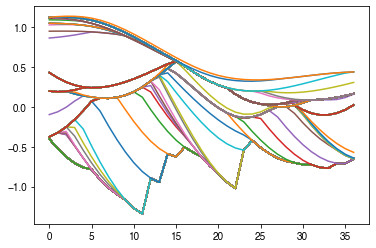

In [32]:
%matplotlib inline
fakecrop = xy_topo[:, int(hmm[0, 0]):int(hmm[1, 0])]
for i in range (0, num_timesteps):
    plt.plot(fakecrop[i, :])

In [33]:
hmm

array([[ 2.60014572e+02, -4.73066488e-01],
       [ 2.97907565e+02, -4.43501509e-02],
       [ 2.64163440e+02, -6.80509877e-01],
       [ 2.77439817e+02,  6.62863231e-02]])

In [36]:
# st_time = np.where(np.logical_and(np.isclose(xy_topo, hmm[2, 1], atol=0.005), (np.isclose(strat, hmm[2, 1], atol=0.005))))[0][0] ##get the row index of the start time picked from the plot
searchst = np.arange(int(hmm[2, 0])-5, int(hmm[2, 0])+5)
searchen = np.arange(int(hmm[3, 0])-5, int(hmm[3, 0])+5)
st_time = np.where(np.isclose(xy_topo[:, searchst], hmm[2, 1], atol=0.05))[0][0]
en_time = np.where(np.isclose(xy_topo[:, searchen], hmm[3, 1], atol=0.01))[0][0]
#en_time = np.where(np.logical_and(np.isclose(xy_topo, hmm[3, 1], atol=0.001), (np.isclose(strat, hmm[3, 1], atol=0.001))))[0][0] ##get the row index of the start time picked from the plot
print(st_time, en_time) #start and end times of bar deposition

barleft = int(hmm[0, 0])
barright = int(hmm[1, 0])

0 151


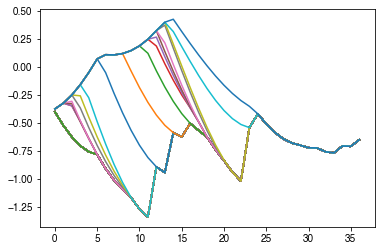

In [37]:
fakecrop = fakecrop[st_time:en_time, :]
for i in range (0, len(fakecrop)):
    plt.plot(fakecrop[i, :])

Enter bar ID:  340
Enter bar facies type:  LA


(239, 82)


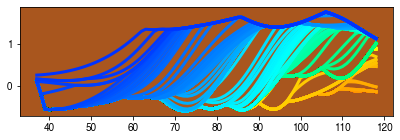

In [32]:
# st_time = int(input('Enter start model timestep for video: '))
# en_time = int(input('Enter end model timestep for video: '))

# barleft = int(input('Enter left limit of plot here: '))
# barright = int(input('Enter right limit of plot here: '))
# buffer = 50 #some extra buffer space to account for widening during the run
# rblim = data[:, 3, :].min()+barleft-(buffer/2)
# lblim = rblim+(barright-barleft+(buffer/2))

barID = input('Enter bar ID: ')
pkg_type = input('Enter bar facies type: ')
cropped_topo = xy_topo[st_time:en_time+1, barleft:barright+1]
print(cropped_topo.shape)
plt.figure(figsize = (10, 2))
for i, t in zip(np.arange(0, len(cropped_topo)), np.arange(st_time, en_time+1)):
    plt.plot(position[barleft:barright+1], cropped_topo[i], color = cpick.to_rgba(t), lw=3)
ax = plt.gca()
ax.set_facecolor('xkcd:sienna')
ax.set_aspect('10')

#lt.colorbar(cpick,label="Time")

Pull flow depth data

In [59]:
maxdep = np.nanmax(trueflow[st_time:en_time+1, :])
depCV = stats.variation(trueflow[st_time:en_time+1, :][~np.isnan(trueflow[st_time:en_time+1, :])].ravel())

In [ ]:
print()


## Crop EVERYTHING

In [73]:
## crop the strat matrix too
xy_topoc = copy.deepcopy(cropped_topo)
positionc = position[barleft:barright+1]
stratc = xy_strat[st_time:en_time+1, barleft:barright+1]
#stratconditionc = stratcondition[st_time:en_time+1, barleft:barright+1]

end_t = len(xy_topoc)
num_timesteps = end_t

shearc = shear[st_time:en_time+1, barleft:barright+1]
scaleflowc = scaleflow[st_time:en_time+1, barleft:barright+1]
trueflowc = trueflow[st_time:en_time+1, barleft:barright+1]
flowvelc = flowvel[st_time:en_time+1, barleft:barright+1]
#erosurfc = erosurf[st_time:en_time+1, barleft:barright+1]

 Declare maximum flow depth for scaling

In [74]:
temp = 20.0 #temperature in degrees celcius
kv = (1.14-0.031*(temp-15)+0.00068*((temp-15)**2))*10**-6

D_star = np.power((1.65*9.81)/(1e3*(kv**2)), 0.333)*3.1e-4

d50um = 310
chezy_rough = 18*(np.log10(4*trueflowc/d50)) #i think this is log10, else they would've put ln no?

mmp =(p*(flowvelc**2))/(1650*(chezy_rough**2)*d50)## modified mobility parameter
mmprange = [0.01, 0.025, 0.17, 0.35, 1.5, 10] ## LP, R, D, D-UP, UP

 Declaring what the threshold for a hiatal surface is

In [75]:
#ages_ero = np.empty_like(xy_topoc)
posnew = np.arange(0, xy_topoc.shape[1])

Define ages and do the hiatus stuff

In [76]:
cmap_vvfac = ListedColormap(['xkcd:mud brown', 'xkcd:shit', 'xkcd:dark tan', 'xkcd:sand', 'xkcd:stone'])
mmprange = [0.01, 0.025, 0.17, 0.35, 1.5, 10] ## LP, R, D, D-UP, UP
norm_vvfac = BoundaryNorm(mmprange, cmap_vvfac.N)

In [77]:
def movinggrad(stratarray, posarray):
    ## find the moving gradient of the surfaces at 1m intervals
    ##stratarray = array with final stratigraphy, posarray = array with xposition in m
    #create gradmatrix
    
    gradmatrix = np.zeros_like(stratarray)
    angles = np.zeros_like(gradmatrix)

    for t in range (0, stratarray.shape[0]): #for each timestep in the matrix
        for x in range (0, stratarray.shape[1]-1): #for each x position, have to stop before 1 to work with array dims
            gradmatrix[t, x] = abs(stratarray[t, x+1]-stratarray[t, x])/(posarray[x+1]-posarray[x])
            angles[t, x] = np.degrees(np.arctan(gradmatrix[t,x]))
            #print(gradmatrix[t, x], angles[t,x])
    return gradmatrix, angles

##### Take a look at the facies

Last timestep is 127


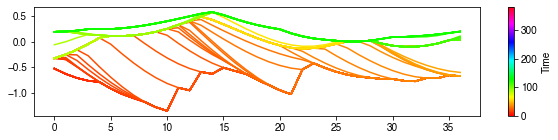

In [78]:
plt.figure(figsize = (10,2))
for i in range (0, end_t):
    plt.plot(xy_topoc[i], color = cpick.to_rgba(i))
plt.colorbar(cpick,label="Time")
print(f'Last timestep is {end_t}')

Find the left and right edges of depositional packages, append depositional matrix to get co-ordintes of rectangles for wheeler diagram.

In order for the logic statement to work to find the polygons, I created a border of nans around all ofthe arrays 

In [79]:
nan_border = np.empty([end_t, 1])
nan_border.shape
nan_border[:] = np.nan
#topointerp_nb = np.concatenate((nan_border, strat, nan_border), axis = 1) #nb = nan border
stratinterpcub_nb = np.concatenate((nan_border, xy_topoc, nan_border), axis = 1)

posnew = np.arange(0, xy_topoc.shape[1], dtype = float)
posnew_nb = np.insert(posnew, [0], [np.nan])
posnew_nb = np.insert(posnew_nb, -1, np.nan)

In [80]:
SIC_startcrop = copy.deepcopy(xy_topoc)
SIC_startcrop = np.concatenate((nan_border, SIC_startcrop, nan_border), axis = 1)

SIC_startcrop = np.delete(SIC_startcrop, 0, axis = 0)
SIC_startcrop.shape

SIC_endcrop = copy.deepcopy(xy_topoc)
SIC_endcrop = np.concatenate((nan_border, SIC_endcrop, nan_border), axis = 1)

SIC_endcrop = np.delete(SIC_endcrop, -1, axis=0)
SIC_endcrop.shape

delta = SIC_startcrop-SIC_endcrop

delta[np.where(delta[:]==0)] = np.nan


In [81]:

#print(len(posnew_nb))
#l_edges = np.empty([1,]) #left edge distance measure of the wheeler fill
l_idx = np.empty([1,]) #index value of left edge
#r_edges = np.empty([1,]) #right edge of the wheeler fill
r_idx = np.empty([1,]) #index value of right edge
surf_age = np.empty([1,]) #age of each deposit for the wheeler diagram
for i in range (0, len(delta)):
    #if ~np.isnan(deposurf[i, 0]):
    #   rectangles[i, 0] = ages[i, 0] #if the left edge of the stratigraphy is a depositional surface

    for xpos in range (0, len(posnew_nb)-1):
        l_edge = np.all((np.isnan(delta[i, xpos]) and ~np.isnan(delta[i, xpos+1])))
        r_edge = np.all((~np.isnan(delta[i, xpos]) and np.isnan(delta[i, xpos+1])))
        #print(xpos, 'L', l_edge)
        #print(xpos, 'R', r_edge)
        if l_edge == True:
            #l_edges = np.append(l_edges, [posnew_nb[xpos+1]], axis = 0)
            l_idx = np.append(l_idx, [xpos], axis = 0)
            #print(posnew_nb[xpos+1], 'potato')
            surf_age = np.append(surf_age, [i], axis = 0)
        if r_edge == True:
            #print(xpos, 'tomato')
            #r_edges = np.append(r_edges, [posnew_nb[xpos-1]], axis = 0)
            r_idx = np.append(r_idx, [xpos], axis = 0)
            
#surf_age = np.append(surf_age, [i+1], axis = 0)
#print('L', l_edges)
#print('R',r_edges)
#print(dep_age)

Store all those vertices in an array that houses the time of each polygon and the left and right edges of the poly

In [82]:
l_idx = np.reshape(l_idx, [len(l_idx), 1])
#l_index = np.delete(l_index, 1)

l_idx = l_idx.astype(int)
r_idx = np.reshape(r_idx, [len(r_idx), 1])
#r_index = np.delete(r_index, 1)
r_idx = r_idx.astype(int)

#print(l_idx[:, 0], r_idx[:, 0])
surf_age = np.reshape(surf_age, [len(surf_age), 1])

print(l_idx.shape, r_idx.shape, surf_age.shape)

vertices_b = surf_age
vertices_b = np.append(vertices_b, l_idx, axis = 1)
vertices_b = np.append(vertices_b, r_idx, axis = 1)

#print(vertices)#, vertices.shape)


cent_array = np.empty([len(vertices_b), 8])
cent_array[:] = np.nan
cent_mass = np.empty([len(vertices_b), 2]) ##store the centre of mass of the polygons
print(cent_mass.shape)

(40, 1) (40, 1) (40, 1)
(40, 2)


In [83]:
## Plot the filled stratigraphy, create a polygon for each, find the centroid, store the centroid and its age
testfig, ax1 = plt.subplots(1, 1, tight_layout=True, squeeze=True, figsize = (10,6))
poly_data = {}
for i in range (1, len(vertices_b)):
    time = int(vertices_b[i, 0])
    left = int(vertices_b[i, 1])
    right = int(vertices_b[i, 2])

    poly = ax1.fill_between(posnew[left:right], xy_topoc[time, left:right], xy_topoc[time+1, left:right], color=cpick.to_rgba(i))
    pverts = poly.get_paths()[0].vertices
    
    polygon = Polygon(pverts) #create a shapely polygon
    #print(polygon)
    poly_data[i] = polygon
    area = polygon.area
    bounds = polygon.bounds
    #print(type(bounds[0]))
    cent_array[i, 4] = bounds[0]
    cent_array[i, 5] = bounds[1]
    cent_array[i, 6] = bounds[2]
    cent_array[i, 7] = bounds[3]
    cent_array[i, 3] = area
    ctroid = polygon.centroid
    cent_array[i, 0] = time
    cent_array[i, 1] = ctroid.x
    cent_array[i, 2] = ctroid.y

    
    #ax1.plot(cent_array[i, 1], cent_array[i, 2], 'k*')
#ax1.set_facecolor('xkcd:midnight blue')
    

ax1.set_xlim(posnew.min(), posnew.max())
#ax1.set_ylim(xy_topoc.min(), xy_topoc.max())
#print('12', poly_data[12])
plt.close(testfig)
#for i in range (0, num_timesteps-1):
#   plt.plot(posnew, stratinterpcub[i, :], 'k')


Centroids are being plotted in very tiny polygons so this is a bit of code to delete the centroids of the polygons with the 10th percentile smallest area


In [84]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 4))
#too_small_area = (cent_array[np.where(abs(cent_array[:, 3])<0.000001)])
#print(cent_array[:, 3])
ax1.hist(cent_array[:, 3])
#ptile10 = np.nanpercentile(cent_array[:, 3], 20)
ptile10 = 1 ## setting an actual threshold bc some of these are still too small
print(ptile10)
ax1.axvline(ptile10, c = 'r')

cent_wnan = copy.deepcopy(cent_array)
deletewhere = np.where(cent_array[:, 3] < ptile10)
cent_wnan[deletewhere] = np.nan

cent_nonan = cent_wnan[~np.isnan(cent_wnan).any(axis = 1)] #delete all rows in cent_wnan matrix with nan values
ax2.hist(cent_nonan[:, 0])
ax1.set_title('Distribution of polygon areas woth 10thp', fontsize = 12)
ax2.set_title('distribution of ages of polys with area > 10thp', fontsize = 12)
textstr1 = str(len(cent_array))
textstr2 = len(cent_nonan)
ax1.set_xlabel('polygon area')
ax2.set_xlabel('deposit age (10s of min)')
ax1.text(2, 200, 'n='+str(len(cent_array)))
ax2.text(25, 40, 'n='+str(len(cent_nonan)))
plt.close(fig)

1


In [85]:
## using cos rule to calculate bearing angles instead
## impose a limit on the y axis to create a y axis vector
def dist_between(x1, y1, x2, y2):
    d = np.sqrt((x1-x2)**2+(y1-y2)**2)
    return d

def angle_between(ax, ay, bx, by, ox = 0, oy = 0):
    
    '''find the angle between two vectors in centroid space, i.e. the trajectory'''

    ##find the lengths of all the sides of the triangle
    oa = dist_between(ox, oy, ax, ay)
    ob = dist_between(ox, oy, bx, by)
    ab = dist_between(ax, ay, bx, by)
        
    #use cosing rule to get the bearing
    cos_theta = (oa**2+ob**2-ab**2)/(2*oa*ob)
    bear = np.rad2deg(np.arccos(cos_theta))
    #if bx < ax:
    #    bear = 360-bear
    return bear

In [86]:
def tan_bearing(ax, ay, bx, by):
    ''' find the bearing using tan instead of the cos rule'''
    dx = bx-ax
    dz = by-ay
    
    
    ## account for the differences in sngle based on the quadrant
    # Q1
    if np.logical_and(bx>ax, by>ay): 
        theta = np.rad2deg(np.arctan(dx/dz))
    # Q4
    elif np.logical_and(bx>ax, by<ay): 
        alpha = np.rad2deg(np.arctan(dz/dx))
        theta = 90 + abs(np.rad2deg(np.arctan(alpha))) ## because alpha will be negative
    # Q2
    elif np.logical_and(bx<ax, by>ay): 
        alpha = np.rad2deg(np.arctan(dz/dx))
        theta = 270 + abs(alpha) ## because alpha will be negative 
    # Q3
    else: 
        alpha = np.rad2deg(np.arctan(dz/dx))
        theta = 270- abs(alpha)

    if theta > 360:
        print(f'ERROR: ({ax, ay}, {bx, by})')
    return theta

In [87]:
bearings_usingtan = np.empty(len(cent_nonan)-1)
for i in range (0, len(cent_nonan)-1):
    bearings_usingtan[i] = tan_bearing(cent_nonan[i, 1], cent_nonan[i, 2],
                                       cent_nonan[i+1, 1],cent_nonan[i+1, 2])
#calculate the difference in trajectory between centroids
ang_between = np.empty(len(cent_nonan)-1)
for i in range(0, len(cent_nonan)-2):
    #print('a',cent_nonan[i, 1:3])
    #print('b', cent_nonan[i+1, 1:3])
    ax, ay, bx, by = cent_nonan[i:i+2, 1:3].ravel()
    #print(ax, ay, bx, by)
    ang_between[i] = angle_between(ax, ay, bx, by)  

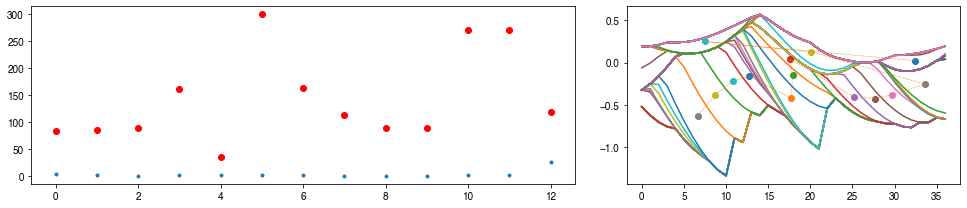

In [88]:
fig = plt.figure(tight_layout=True, figsize = (15, 3))
ax1 = fig.add_subplot(121)
ax1.plot(np.arange(0, len(bearings_usingtan)), bearings_usingtan, 'ro')
ax1.plot(np.arange(0, len(ang_between)), ang_between, '.')
ax2 = fig.add_subplot(122)
for i in range(0, end_t):
    ax2.plot(xy_topoc[i])
for j in range (0, len(cent_nonan)):
    ax2.plot(cent_nonan[j, 1], cent_nonan[j, 2], 'o')
ax2.plot(cent_nonan[:, 1], cent_nonan[:, 2], lw=0.5, ls = '--')
ax2.set_aspect(10)

Note to future self, all of these calculations are actually right, the stratigraphy is just bonkers
--Nov 29 2021

In [89]:
fig, ax = plt.subplots(7, 5, figsize = (8,8))
ax = ax.ravel()
if len(cent_nonan) < 35: 
    for i in range (0, len(cent_nonan)-2):
        ax[i].plot(cent_nonan[i, 1], cent_nonan[i, 2], 'r*', cent_nonan[i+1, 1], cent_nonan[i+1, 2], 'g*',)
        ax[i].set_aspect('1')
        ax[i].set_title(f'{np.round(bearings_usingtan[i], 2)}, ({np.round(cent_nonan[i, 1], 2)},{np.round(cent_nonan[i, 2], 2)}), ({np.round(cent_nonan[i+1, 1], 2)}, {np.round(cent_nonan[i+1, 2], 2)})')
else:
    randset = np.random.randint(0, len(cent_nonan)-1, 35)
    for i, r in enumerate (randset):
        ax[i].plot(cent_nonan[r, 1], cent_nonan[r, 2], 'r*', cent_nonan[r+1, 1], cent_nonan[r+1, 2], 'g*',)
        ax[i].set_aspect('1')
        ax[i].set_title(f'{np.round(bearings_usingtan[r], 2)}, ({np.round(cent_nonan[r, 1], 2)},{np.round(cent_nonan[r, 2], 2)}), ({np.round(cent_nonan[r+1, 1], 2)}, {np.round(cent_nonan[r+1, 2], 2)})')
        
plt.close(fig) 

In [90]:
## calculate angles for the rose diagram ##all of these bearings are right (SA, 1/12/21)
nbins = np.deg2rad(np.arange(0, 370, 10)) #10° bins
rad_bearings = np.deg2rad(bearings_usingtan) #these are fine, exactly the same as the degree version, duh
bearing_radii, bearing_edges = np.histogram(rad_bearings, bins = nbins, density=False)
bearing_centres = bearing_edges[:-1]+0.5*(bearing_edges[1]-bearing_edges[0])

wedge_width = ((2*np.pi)/len(nbins))*np.ones(len(bearing_centres)) #10°, this is also fine. 


rad_ang_between = np.deg2rad(ang_between)
ab_radii, ab_edges = np.histogram(rad_ang_between, bins = nbins, range= (0, 2*np.pi))
ab_centres = ab_edges[:-1]+0.5*(ab_edges[1]-ab_edges[0])

mean_bearing = np.average(bearings_usingtan)
variance = abs(bearings_usingtan-mean_bearing)

rad_variance = np.deg2rad(variance)
var_radii, var_edges = np.histogram(rad_variance, bins = nbins, range= (0, 2*np.pi))
var_centres = var_edges[:-1]+0.5*(var_edges[1]-var_edges[0])


In [91]:
## Plot the diagram
fig = plt.figure(figsize=(10, 3))
fig.subplots_adjust(wspace=.50)

ax1 = fig.add_subplot(141, projection='polar')
ax2 = fig.add_subplot(142, projection='polar')
ax3 = fig.add_subplot(143)


ax1.set_theta_zero_location('N')
ax2.set_theta_zero_location('N')
ax1.set_theta_direction(-1)
ax2.set_theta_direction(-1)
for i in range(0, end_t):
    ax3.plot(posnew, xy_topoc[i], color=cpick.to_rgba(i))
for j in range(0, len(cent_nonan)):
    ax3.plot(cent_nonan[j, 1], cent_nonan[j, 2], 'k*')


ax1.bar(bearing_centres, bearing_radii, width = wedge_width, bottom=0)
ax2.bar(var_centres, var_radii, width = wedge_width, bottom=0)

fig.suptitle(f'{iloc}-{barID}');
plt.close(fig)
#plt.savefig(f'{savefilesto}bardims/rose/{nickname}-{iloc}-{barID}.png', dpi = 100)

In [92]:
##calculate the CV of the bearings and angle between calculations
bearCV = stats.variation(bearings_usingtan)
angbtwnCV = stats.variation(ang_between)

In [93]:

poly_widths = cent_nonan[:, 6]-cent_nonan[:, 4]
poly_widths = np.reshape(poly_widths, [len(poly_widths), 1])

poly_heights = cent_nonan[:, 7]-cent_nonan[:, 5]
poly_heights = np.reshape(poly_heights, [len(poly_heights), 1])
#print(poly_widths.shape)
mod_ht =stats.mode(poly_heights)[0]
med_ht = np.median(poly_heights)
mean_ht = np.mean(poly_heights)
cent_nonan = np.concatenate((cent_nonan, poly_widths, poly_heights), axis = 1)

In [94]:
range_x = position.max()-position.min()
range_y = np.nanmax(xy_topoc)-np.nanmin(xy_topoc)
print(range_x, range_y)

355.0 1.9136998426179186


In [95]:
dists = np.zeros([len(cent_nonan[:, 3]), 1])
reltime = np.zeros([len(cent_nonan[:, 3]), 1]) #will store the elapsed time between two consecutive centroids
delx = np.zeros([len(cent_nonan[:, 3]), 1])
dely = np.zeros([len(cent_nonan[:, 3]), 1])

for i in range (0, len(cent_nonan)-1):
    dists[i, 0] = ((cent_nonan[i+1, 1]-cent_nonan[i, 1])**2+(cent_nonan[i+1, 2]-cent_nonan[i, 2])**2)**0.5
    reltime[i,0] = cent_nonan[i+1, 0]-cent_nonan[i, 0]
    delx[i, 0] = abs(cent_nonan[i+1, 1]-cent_nonan[i, 1])/range_x
    dely[i, 0] = abs(cent_nonan[i+1, 2]-cent_nonan[i, 2])/range_y
cent_nonan = np.concatenate((cent_nonan, dists, reltime, delx, dely), axis = 1)


In [96]:
delx = np.delete(delx, -1, axis=0)
dely = np.delete(dely, -1, axis=0)

In [97]:
fig=plt.figure()
fullbar = plt.fill_between(posnew, xy_topoc[0], xy_topoc[-1])
plt.close(fig)
barverts = fullbar.get_paths()[0].vertices
    
bar_polygon = Polygon(barverts) 

bds = bar_polygon.bounds
bar_area = bar_polygon.area
left = bds[0]
bottom = bds[1]
right = bds[2]
top = bds[3]
#bar_height = abs(bottom-top)
bar_height = abs(np.nanmin(xy_topoc[-1])-np.nanmax(xy_topoc[-1]))
bar_width = right-left

fd_bar_height = bar_height/bankfull
fd_bar_width = bar_width/bankfull
bar_w_to_h = bar_width/bar_height


NameError: name 'bankfull' is not defined

In [54]:
dist_btwn = np.empty(len(cent_nonan)-1)
for i in range(0, len(cent_nonan)-2):
    ax, ay, bx, by = cent_nonan[i:i+2, 1:3].ravel()
    
    dist_btwn[i] = dist_between(ax, ay, bx, by)
dist_btwn = dist_btwn/bar_width
xdist = np.empty(len(cent_nonan)-1)
for i in range(0, len(cent_nonan)-2):
    ax, bx = cent_nonan[i:i+2, 1].ravel()
    
    xdist[i] = abs(ax-bx)
xdist = xdist/bar_width
plt.hist(dist_btwn, **kwargs, range=(0, 1));
plt.hist(xdist, bins=20, range=(0, 1), histtype = 'step');
plt.close()

## Do some statistics on the bar

In [85]:
## using cos rule to calculate bearing angles instead
## impose a limit on the y axis to create a y axis vector
def dist_between(x1, y1, x2, y2):
    d = np.sqrt((x1-x2)**2+(y1-y2)**2)
    return d

def angle_between(ax, ay, bx, by, ox = 0, oy = 0):
    
    '''find the angle between two vectors in centroid space, i.e. the trajectory'''

    ##find the lengths of all the sides of the triangle
    oa = dist_between(ox, oy, ax, ay)
    ob = dist_between(ox, oy, bx, by)
    ab = dist_between(ax, ay, bx, by)
        
    #use cosing rule to get the bearing
    cos_theta = (oa**2+ob**2-ab**2)/(2*oa*ob)
    bear = np.rad2deg(np.arccos(cos_theta))
    #if bx < ax:
    #    bear = 360-bear
    return bear

In [86]:
def tan_bearing(ax, ay, bx, by):
    ''' find the bearing using tan instead of the cos rule'''
    dx = bx-ax
    dz = by-ay
    
    
    ## account for the differences in sngle based on the quadrant
    # Q1
    if np.logical_and(bx>ax, by>ay): 
        theta = np.rad2deg(np.arctan(dx/dz))
    # Q4
    elif np.logical_and(bx>ax, by<ay): 
        alpha = np.rad2deg(np.arctan(dz/dx))
        theta = 90 + abs(np.rad2deg(np.arctan(alpha))) ## because alpha will be negative
    # Q2
    elif np.logical_and(bx<ax, by>ay): 
        alpha = np.rad2deg(np.arctan(dz/dx))
        theta = 270 + abs(alpha) ## because alpha will be negative 
    # Q3
    else: 
        alpha = np.rad2deg(np.arctan(dz/dx))
        theta = 270- abs(alpha)

    if theta > 360:
        print(f'ERROR: ({ax, ay}, {bx, by})')
    return theta

In [87]:
bearings_usingtan = np.empty(len(cent_nonan)-1)
for i in range (0, len(cent_nonan)-1):
    bearings_usingtan[i] = tan_bearing(cent_nonan[i, 1], cent_nonan[i, 2],
                                       cent_nonan[i+1, 1],cent_nonan[i+1, 2])
#calculate the difference in trajectory between centroids
ang_between = np.empty(len(cent_nonan)-1)
for i in range(0, len(cent_nonan)-2):
    #print('a',cent_nonan[i, 1:3])
    #print('b', cent_nonan[i+1, 1:3])
    ax, ay, bx, by = cent_nonan[i:i+2, 1:3].ravel()
    #print(ax, ay, bx, by)
    ang_between[i] = angle_between(ax, ay, bx, by)  

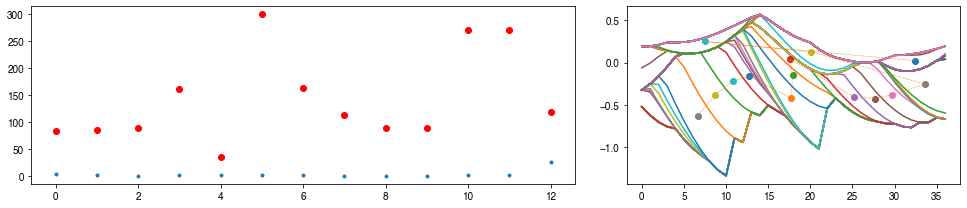

In [88]:
fig = plt.figure(tight_layout=True, figsize = (15, 3))
ax1 = fig.add_subplot(121)
ax1.plot(np.arange(0, len(bearings_usingtan)), bearings_usingtan, 'ro')
ax1.plot(np.arange(0, len(ang_between)), ang_between, '.')
ax2 = fig.add_subplot(122)
for i in range(0, end_t):
    ax2.plot(xy_topoc[i])
for j in range (0, len(cent_nonan)):
    ax2.plot(cent_nonan[j, 1], cent_nonan[j, 2], 'o')
ax2.plot(cent_nonan[:, 1], cent_nonan[:, 2], lw=0.5, ls = '--')
ax2.set_aspect(10)

Note to future self, all of these calculations are actually right, the stratigraphy is just bonkers
--Nov 29 2021

In [89]:
fig, ax = plt.subplots(7, 5, figsize = (8,8))
ax = ax.ravel()
if len(cent_nonan) < 35: 
    for i in range (0, len(cent_nonan)-2):
        ax[i].plot(cent_nonan[i, 1], cent_nonan[i, 2], 'r*', cent_nonan[i+1, 1], cent_nonan[i+1, 2], 'g*',)
        ax[i].set_aspect('1')
        ax[i].set_title(f'{np.round(bearings_usingtan[i], 2)}, ({np.round(cent_nonan[i, 1], 2)},{np.round(cent_nonan[i, 2], 2)}), ({np.round(cent_nonan[i+1, 1], 2)}, {np.round(cent_nonan[i+1, 2], 2)})')
else:
    randset = np.random.randint(0, len(cent_nonan)-1, 35)
    for i, r in enumerate (randset):
        ax[i].plot(cent_nonan[r, 1], cent_nonan[r, 2], 'r*', cent_nonan[r+1, 1], cent_nonan[r+1, 2], 'g*',)
        ax[i].set_aspect('1')
        ax[i].set_title(f'{np.round(bearings_usingtan[r], 2)}, ({np.round(cent_nonan[r, 1], 2)},{np.round(cent_nonan[r, 2], 2)}), ({np.round(cent_nonan[r+1, 1], 2)}, {np.round(cent_nonan[r+1, 2], 2)})')
        
plt.close(fig) 

In [90]:
## calculate angles for the rose diagram ##all of these bearings are right (SA, 1/12/21)
nbins = np.deg2rad(np.arange(0, 370, 10)) #10° bins
rad_bearings = np.deg2rad(bearings_usingtan) #these are fine, exactly the same as the degree version, duh
bearing_radii, bearing_edges = np.histogram(rad_bearings, bins = nbins, density=False)
bearing_centres = bearing_edges[:-1]+0.5*(bearing_edges[1]-bearing_edges[0])

wedge_width = ((2*np.pi)/len(nbins))*np.ones(len(bearing_centres)) #10°, this is also fine. 


rad_ang_between = np.deg2rad(ang_between)
ab_radii, ab_edges = np.histogram(rad_ang_between, bins = nbins, range= (0, 2*np.pi))
ab_centres = ab_edges[:-1]+0.5*(ab_edges[1]-ab_edges[0])

mean_bearing = np.average(bearings_usingtan)
variance = abs(bearings_usingtan-mean_bearing)

rad_variance = np.deg2rad(variance)
var_radii, var_edges = np.histogram(rad_variance, bins = nbins, range= (0, 2*np.pi))
var_centres = var_edges[:-1]+0.5*(var_edges[1]-var_edges[0])


In [91]:
## Plot the diagram
fig = plt.figure(figsize=(10, 3))
fig.subplots_adjust(wspace=.50)

ax1 = fig.add_subplot(141, projection='polar')
ax2 = fig.add_subplot(142, projection='polar')
ax3 = fig.add_subplot(143)


ax1.set_theta_zero_location('N')
ax2.set_theta_zero_location('N')
ax1.set_theta_direction(-1)
ax2.set_theta_direction(-1)
for i in range(0, end_t):
    ax3.plot(posnew, xy_topoc[i], color=cpick.to_rgba(i))
for j in range(0, len(cent_nonan)):
    ax3.plot(cent_nonan[j, 1], cent_nonan[j, 2], 'k*')


ax1.bar(bearing_centres, bearing_radii, width = wedge_width, bottom=0)
ax2.bar(var_centres, var_radii, width = wedge_width, bottom=0)

fig.suptitle(f'{iloc}-{barID}');
plt.close(fig)
#plt.savefig(f'{savefilesto}bardims/rose/{nickname}-{iloc}-{barID}.png', dpi = 100)

In [92]:
##calculate the CV of the bearings and angle between calculations
bearCV = stats.variation(bearings_usingtan)
angbtwnCV = stats.variation(ang_between)

In [93]:

poly_widths = cent_nonan[:, 6]-cent_nonan[:, 4]
poly_widths = np.reshape(poly_widths, [len(poly_widths), 1])

poly_heights = cent_nonan[:, 7]-cent_nonan[:, 5]
poly_heights = np.reshape(poly_heights, [len(poly_heights), 1])
#print(poly_widths.shape)
mod_ht =stats.mode(poly_heights)[0]
med_ht = np.median(poly_heights)
mean_ht = np.mean(poly_heights)
cent_nonan = np.concatenate((cent_nonan, poly_widths, poly_heights), axis = 1)

In [94]:
range_x = position.max()-position.min()
range_y = np.nanmax(xy_topoc)-np.nanmin(xy_topoc)
print(range_x, range_y)

355.0 1.9136998426179186


In [95]:
dists = np.zeros([len(cent_nonan[:, 3]), 1])
reltime = np.zeros([len(cent_nonan[:, 3]), 1]) #will store the elapsed time between two consecutive centroids
delx = np.zeros([len(cent_nonan[:, 3]), 1])
dely = np.zeros([len(cent_nonan[:, 3]), 1])

for i in range (0, len(cent_nonan)-1):
    dists[i, 0] = ((cent_nonan[i+1, 1]-cent_nonan[i, 1])**2+(cent_nonan[i+1, 2]-cent_nonan[i, 2])**2)**0.5
    reltime[i,0] = cent_nonan[i+1, 0]-cent_nonan[i, 0]
    delx[i, 0] = abs(cent_nonan[i+1, 1]-cent_nonan[i, 1])/range_x
    dely[i, 0] = abs(cent_nonan[i+1, 2]-cent_nonan[i, 2])/range_y
cent_nonan = np.concatenate((cent_nonan, dists, reltime, delx, dely), axis = 1)


In [96]:
delx = np.delete(delx, -1, axis=0)
dely = np.delete(dely, -1, axis=0)

In [97]:
fig=plt.figure()
fullbar = plt.fill_between(posnew, xy_topoc[0], xy_topoc[-1])
plt.close(fig)
barverts = fullbar.get_paths()[0].vertices
    
bar_polygon = Polygon(barverts) 

bds = bar_polygon.bounds
bar_area = bar_polygon.area
left = bds[0]
bottom = bds[1]
right = bds[2]
top = bds[3]
#bar_height = abs(bottom-top)
bar_height = abs(np.nanmin(xy_topoc[-1])-np.nanmax(xy_topoc[-1]))
bar_width = right-left

fd_bar_height = bar_height/bankfull
fd_bar_width = bar_width/bankfull
bar_w_to_h = bar_width/bar_height


NameError: name 'bankfull' is not defined

In [54]:
dist_btwn = np.empty(len(cent_nonan)-1)
for i in range(0, len(cent_nonan)-2):
    ax, ay, bx, by = cent_nonan[i:i+2, 1:3].ravel()
    
    dist_btwn[i] = dist_between(ax, ay, bx, by)
dist_btwn = dist_btwn/bar_width
xdist = np.empty(len(cent_nonan)-1)
for i in range(0, len(cent_nonan)-2):
    ax, bx = cent_nonan[i:i+2, 1].ravel()
    
    xdist[i] = abs(ax-bx)
xdist = xdist/bar_width
plt.hist(dist_btwn, **kwargs, range=(0, 1));
plt.hist(xdist, bins=20, range=(0, 1), histtype = 'step');
plt.close()

## Do some statistics on the bar

In [55]:
packages_rel_to_bar_height = cent_nonan[:, 9]/bar_height
prop_of_xs_is_bar = bar_area/xs_polygon.area 
bar_time = (en_time-st_time)*interval_to_plot #how long wad the bar around
bar_time_rel_to_xs_time = bar_time/(datamaster.shape[2]*interval_to_plot) #how old is bar rel to channel
#age_dist_in_bar = ages_ero#/bar_time #how many ages represented in bar, scaled to the length of the bar deposition time
age_dist = en_time-st_time
print(age_dist)

print('Bar height rel to flow depth:', fd_bar_height)
print('Bar width rel to flow depth: ', fd_bar_width)
print('Bar w/h: ', bar_w_to_h)
print(bankfull)
print(f'Bar makes up {prop_of_xs_is_bar*100}% of the xs\nBar around for {bar_time} hours, which is {bar_time_rel_to_xs_time*100}% of the total channel depo time\nMode package height relative to bar height: {np.quantile(packages_rel_to_bar_height, 0.5)}', end='\n')

fig, ax = plt.subplots(1, 2, figsize = (10, 4), tight_layout = True)
ax[0].hist(packages_rel_to_bar_height.ravel(), bins = 10, range=(0, 1),facecolor = 'k', edgecolor = 'k', alpha = .5);
#ax[1].hist(age_dist_in_bar.ravel(), bins = 20, facecolor = 'k', edgecolor = 'k', alpha = .5);
#plt.savefig(f'{savefilesto}bardims/histos/{nickname}-{iloc}-{barID}.png', dpi = 100)
note = 'no more notes everything else is shit'#input('any notes? ')
plt.close()

309
Bar height rel to flow depth: 2.458811505712616
Bar width rel to flow depth:  132.03962353311877
Bar w/h:  53.70058795737205
1.7797687823690005
Bar makes up 72.27501399266424% of the xs
Bar around for 309.0 hours, which is 99.67741935483872% of the total channel depo time
Mode package height relative to bar height: 0.2187175679142916


In [55]:
packages_rel_to_bar_height = cent_nonan[:, 9]/bar_height
prop_of_xs_is_bar = bar_area/xs_polygon.area 
bar_time = (en_time-st_time)*interval_to_plot #how long wad the bar around
bar_time_rel_to_xs_time = bar_time/(datamaster.shape[2]*interval_to_plot) #how old is bar rel to channel
#age_dist_in_bar = ages_ero#/bar_time #how many ages represented in bar, scaled to the length of the bar deposition time
age_dist = en_time-st_time
print(age_dist)

print('Bar height rel to flow depth:', fd_bar_height)
print('Bar width rel to flow depth: ', fd_bar_width)
print('Bar w/h: ', bar_w_to_h)
print(bankfull)
print(f'Bar makes up {prop_of_xs_is_bar*100}% of the xs\nBar around for {bar_time} hours, which is {bar_time_rel_to_xs_time*100}% of the total channel depo time\nMode package height relative to bar height: {np.quantile(packages_rel_to_bar_height, 0.5)}', end='\n')

fig, ax = plt.subplots(1, 2, figsize = (10, 4), tight_layout = True)
ax[0].hist(packages_rel_to_bar_height.ravel(), bins = 10, range=(0, 1),facecolor = 'k', edgecolor = 'k', alpha = .5);
#ax[1].hist(age_dist_in_bar.ravel(), bins = 20, facecolor = 'k', edgecolor = 'k', alpha = .5);
#plt.savefig(f'{savefilesto}bardims/histos/{nickname}-{iloc}-{barID}.png', dpi = 100)
note = 'no more notes everything else is shit'#input('any notes? ')
plt.close()

309
Bar height rel to flow depth: 2.458811505712616
Bar width rel to flow depth:  132.03962353311877
Bar w/h:  53.70058795737205
1.7797687823690005
Bar makes up 72.27501399266424% of the xs
Bar around for 309.0 hours, which is 99.67741935483872% of the total channel depo time
Mode package height relative to bar height: 0.2187175679142916


In [56]:
headers = 'barnm', 'iloc', 'pkg_type', 'st_time', 'en_time', 'time_int_hrs', 'barleft', 'barright', 'depth_max', 'depthCV', 'xsarea', 'pkg_area', 'modal_height', 'median_height', 'mean_height', 'bearingCV', 'angbetweenCV', 'W-H_bar','notes'
variables = barID, iloc, pkg_type, st_time, en_time, bar_time, barleft, barright, maxdep, depCV, xs_area, bar_area, mod_ht, med_ht, mean_ht, bearCV, angbtwnCV, bar_w_to_h, note

In [57]:
exportpath = '/Volumes/SAF_Data/NAYS2DH_files/Data/barCSVs/'

In [58]:
bardata = pd.DataFrame([[barID, iloc, pkg_type, st_time, en_time, bar_time, barleft, barright, maxdep, depCV, xs_area, bar_area, mod_ht, med_ht, mean_ht, bearCV, angbtwnCV, bar_w_to_h, note]],
                       columns=['barnm', 'iloc', 'pkg_type', 'st_time', 'en_time', 'time_int_hrs', 'barleft', 'barright', 'depth_max', 'depthCV', 'xsarea', 'pkg_area', 'modal_height', 'median_height', 'mean_height', 'bearingCV', 'angbetweenCV', 'W-H_bar','notes'])

In [ ]:
bardata.to_csv(f'{exportpath}{barID}.csv', header = headers)